In [1]:
import seaborn.objects as so
from seaborn import load_dataset

tips = load_dataset("tips")

The mark draws an arbitrary line defined by `intercept` and `slope`:

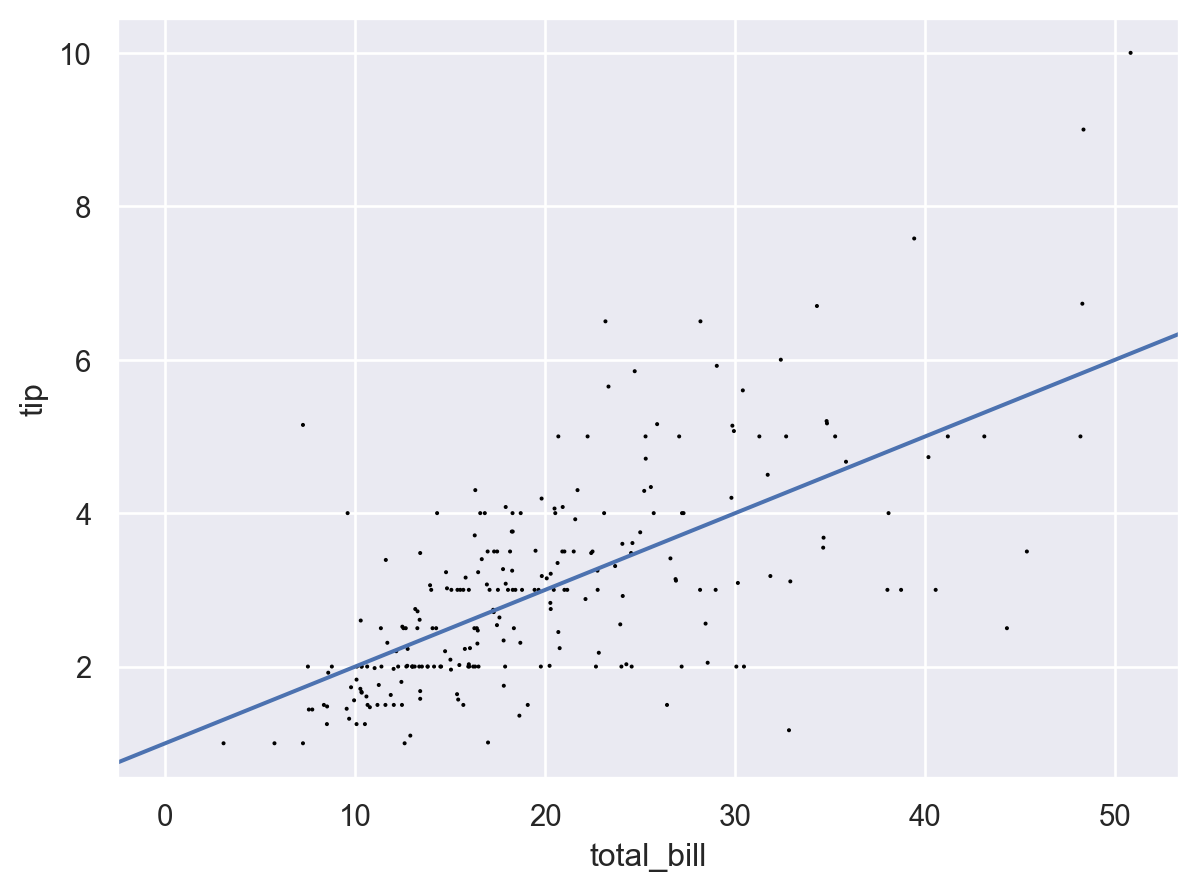

In [2]:
(
    so.Plot(tips, "total_bill", "tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axline(intercept=1, slope=.1))
)


This way, we'are able to provide linear regression fits, too:

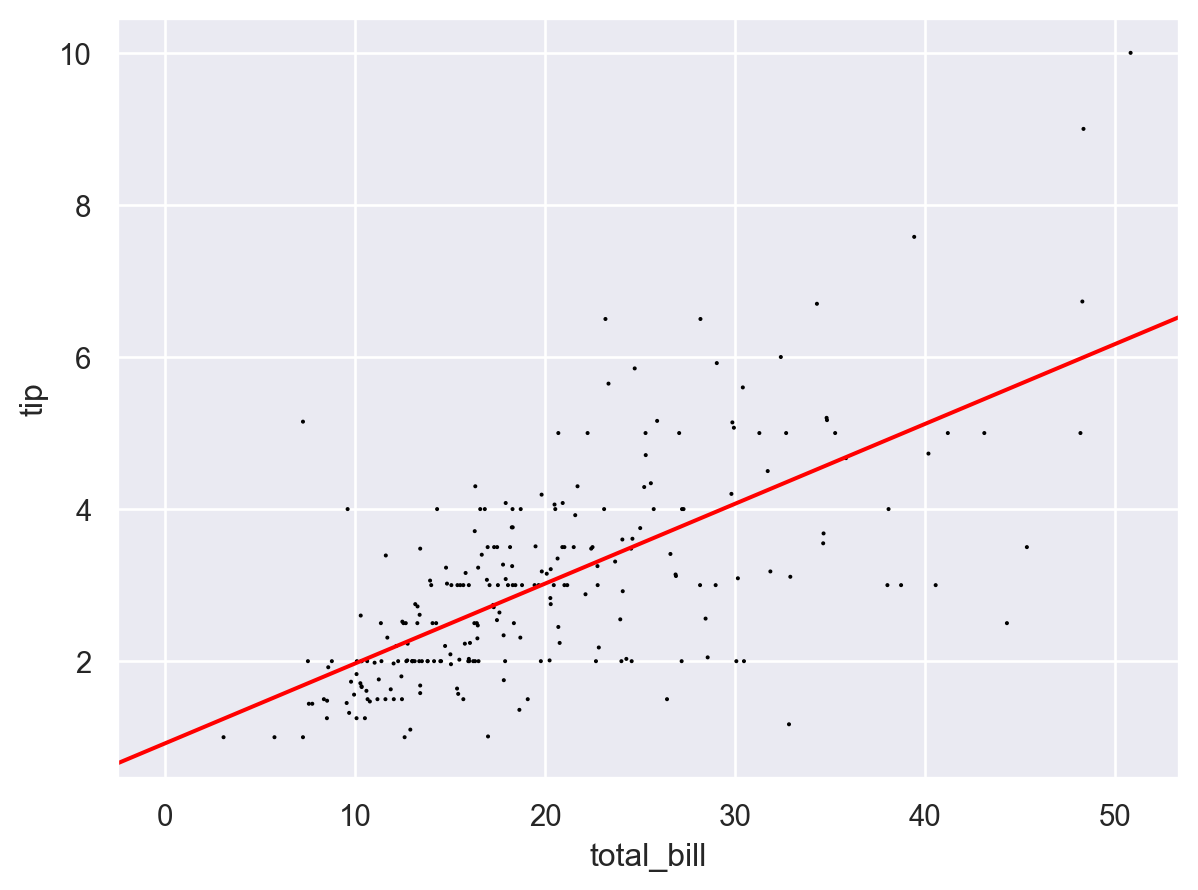

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

fit = lm.fit(tips[["total_bill"]] ,tips["tip"])

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axline(intercept=fit.intercept_, slope=fit.coef_[0], color="red"))
)

Usually, we would like to map data to properties `intercept` and `slope`. Note: To not overplot the data with lines, we tipically utilize either `data=` subset or some kind of aggregation. Let us demonstrate it in examples:

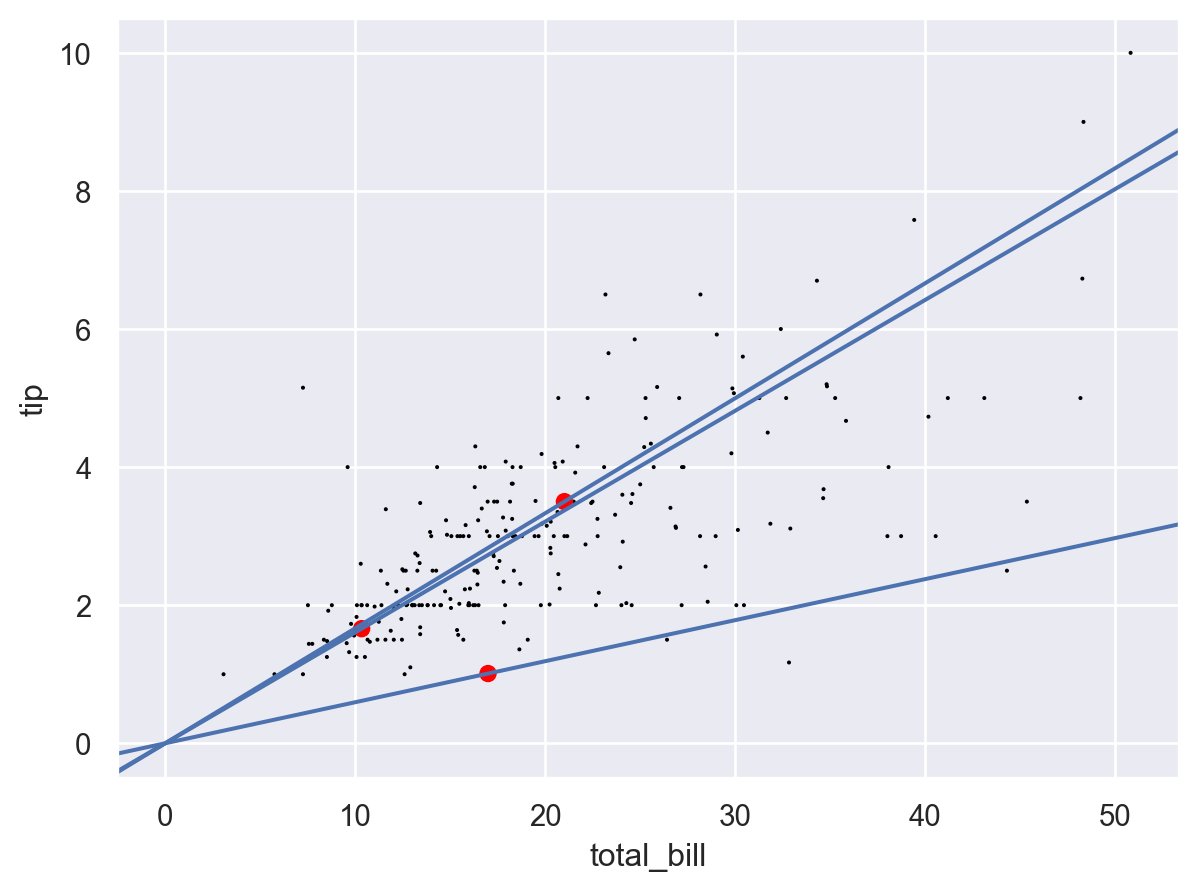

In [4]:
tips["tip_slope"] = tips["tip"]/tips["total_bill"]

# Example - direct mapping of variable on `slope` aesthetics
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Dot(color="red"), data=tips.head(3))
    .add(so.Axline(intercept=0), slope="tip_slope", data=tips.head(3))
)

The `so.Agg()` is not flexible enough to provide `intercept` and/or `slope` aesthetic's aggregations. Therefore, we need to utilize its `so.AggCustom()` generalization.

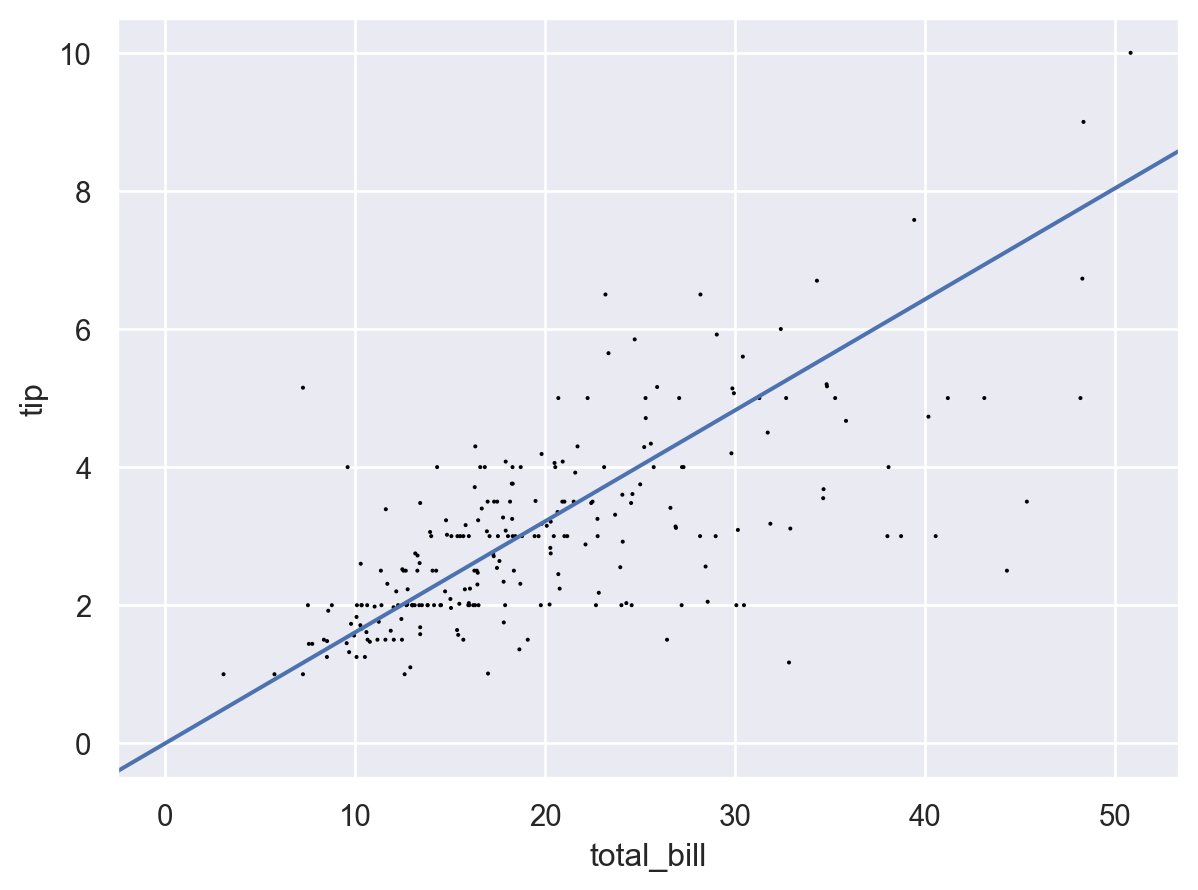

In [5]:
# Example - use of aggregations
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(
        so.Axline(intercept=0), 
        so.AggCustom({"slope": "mean"}),
        slope="tip_slope"
    )
)

The `so.Axline()` inherits from `so.Path()`. Therefore, it's possible to define all the line properties we used there:

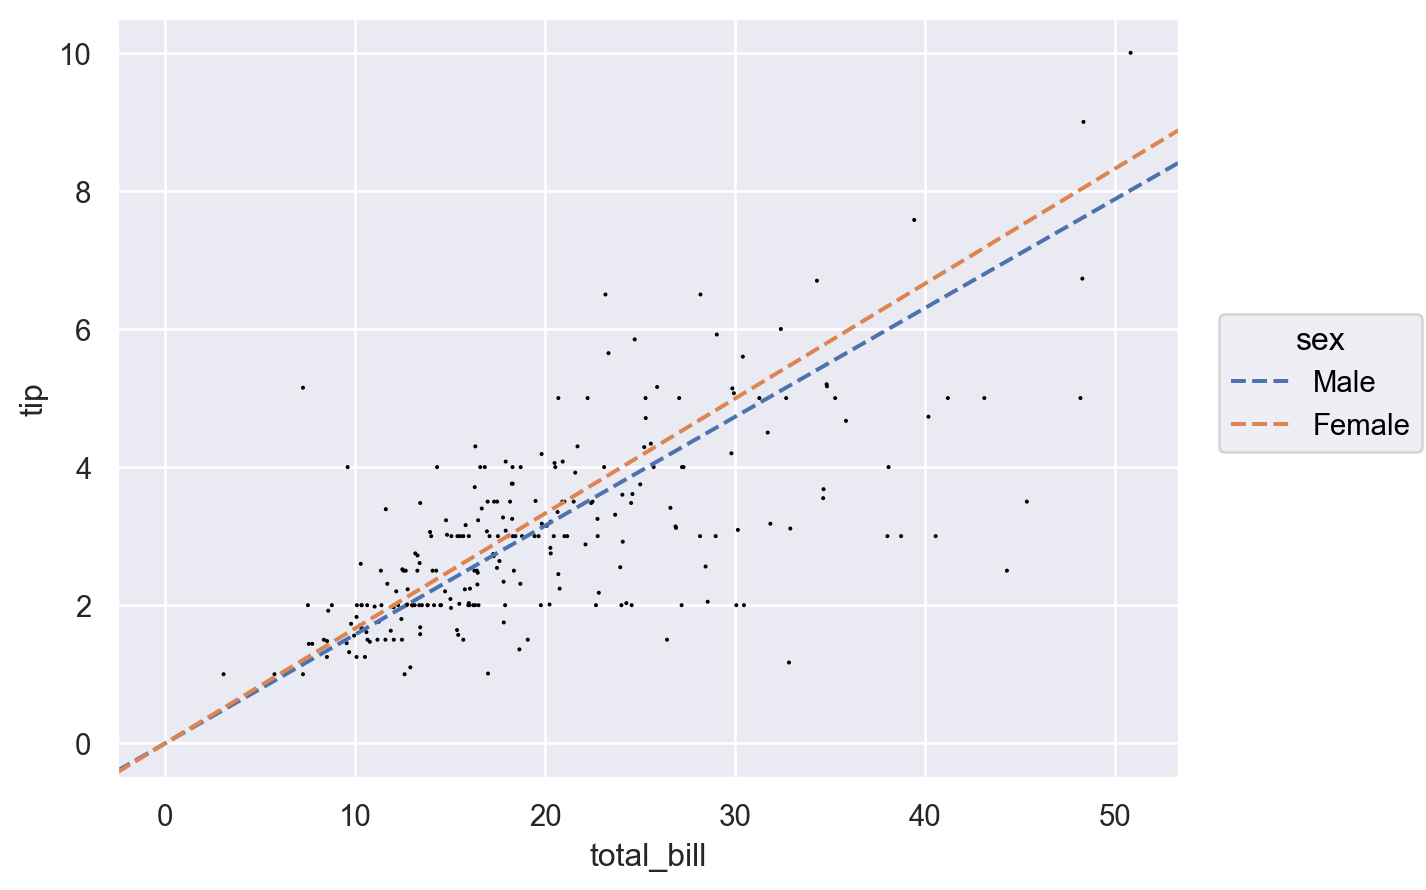

In [6]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axline(intercept=0, linestyle="--"), so.AggCustom({"slope": "mean"}), slope="tip_slope", color="sex")
)